# Data Visualization

This notebook has the finality to visualize and analyse the data of the dataset that is going to be used.

## Imports

In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

## Load the dataset

The dataset that is going to be used is obtained from [Kaggle](https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory) and it contains historical cryptocurrency price data. 

In this notebook I already have the data loaded in the directory `data/raw`.

In [2]:
data_path = "data"

Lets load the data for Bitcoin cryptocurrency. Set the Date column as type `datetim``

In [9]:
data_file = join(data_path, "raw/coin_Bitcoin.csv")
bitcoin_data = pd.read_csv(data_file)
bitcoin_data["Date"] = pd.to_datetime(bitcoin_data["Date"])
bitcoin_data = bitcoin_data.set_index("Date")

The columns of all the files are:

* SNo: index
* Name: cryptocurrency name (e.g Bitcoin)
* Symbol: cryptocurrency symbol (e.g BTC)
* Date: timestamp, each row has the values for one day
* High: highest price achieved of the day
* Low: lowest price achieved of the day
* Open: opening price of the day
* Close: closing price of the day
* Volume: volume of transactions on the given day
* Marketcap : market capitalization in USD


In [10]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2862 entries, 2013-04-29 23:59:59 to 2021-02-27 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Name       2862 non-null   object 
 2   Symbol     2862 non-null   object 
 3   High       2862 non-null   float64
 4   Low        2862 non-null   float64
 5   Open       2862 non-null   float64
 6   Close      2862 non-null   float64
 7   Volume     2862 non-null   float64
 8   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 223.6+ KB


In [11]:
bitcoin_data.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


The `SNo`, `Name`, `Symbol` are just informative. The other columns have a time dependence. 

Lets visualize how each column evolves in time.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

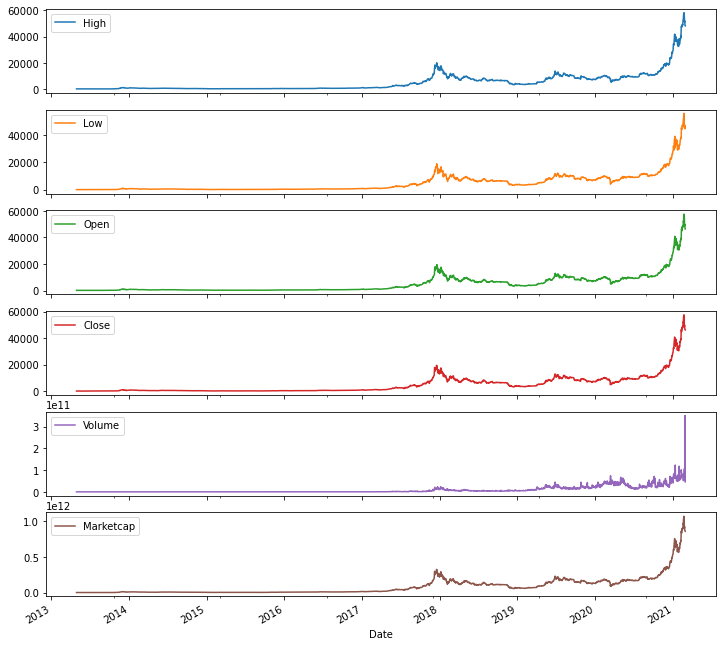

In [12]:
bitcoin_data.plot.line(y=["High", "Low", "Open", "Close", "Volume", "Marketcap"], subplots=True, sharex=True, figsize=(12,12))

If we resample with month frequency and we look at one year

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

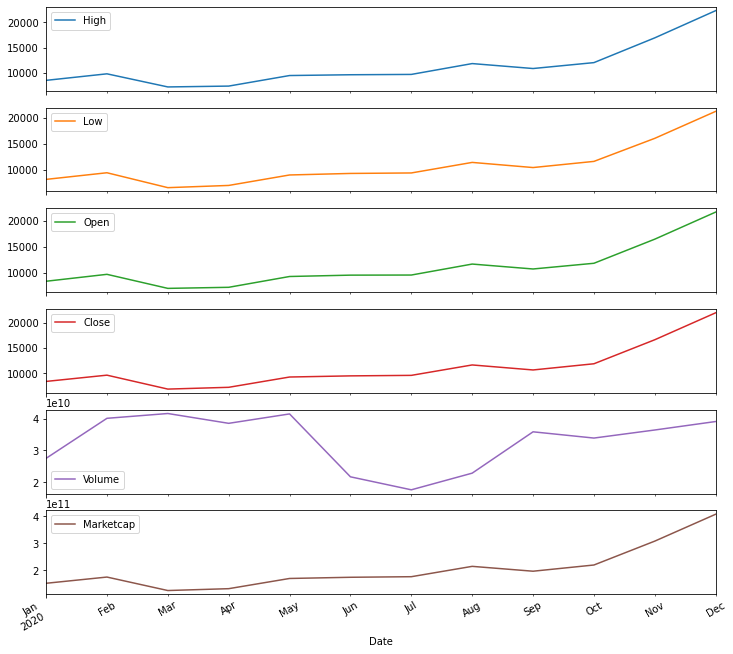

In [24]:
month_data = bitcoin_data.resample("M").mean().loc['2020']
month_data.plot.line(y=["High", "Low", "Open", "Close", "Volume", "Marketcap"], subplots=True, sharex=True, figsize=(12,12))

Let's zoom in to a small period of time

<AxesSubplot:xlabel='Date'>

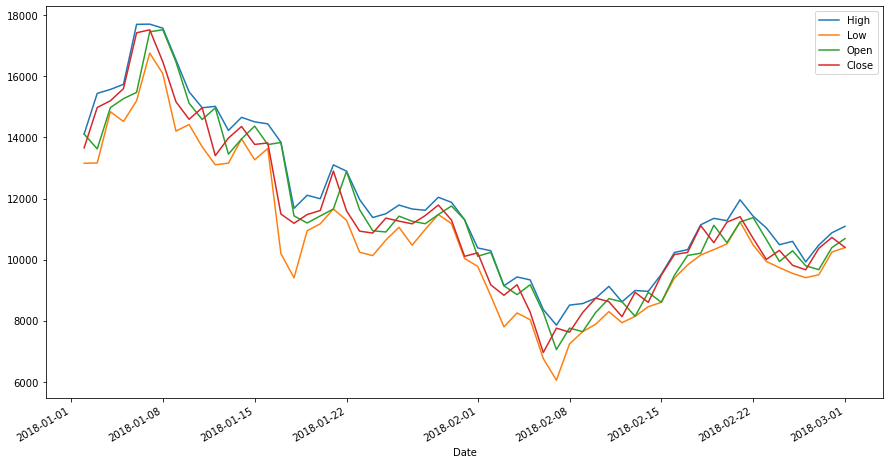

In [18]:
period = bitcoin_data.loc['2018-01-01': '2018-02-28']
period.plot.line(y=["High", "Low", "Open", "Close"], sharex=True, figsize=(15,8))

The target that will be predicted is the closing price of the day. 

Now let's see for what time range do we have data for each cryptocurrency and in what range is the closing price.

As we can see, each cryptocurrency has different time periods of data and closing prices can have a big span of values.

In [19]:
data_raw_path = join(data_path, "raw")
file_names = [f for f in listdir(data_raw_path) if isfile(join(data_raw_path, f))]

stats = pd.DataFrame(columns=["file", "min_close_price", "max_close_price", "min_date", "max_date"])
for file_name in file_names:
    file_data = pd.read_csv(join(data_raw_path, file_name))
    file_data["Date"] = pd.to_datetime(file_data["Date"])
    file_stats = file_data.describe(datetime_is_numeric=True)
    stats = stats.append({
        "file": file_name,
        "min_date": file_stats["Date"]["min"],
        "max_date": file_stats["Date"]["max"],
        "min_close_price": file_stats["Close"]["min"],
        "max_close_price": file_stats["Close"]["max"],
    }, ignore_index=True)

stats["close_price_diff"] = stats["max_close_price"] - stats["min_close_price"]
stats["period_in_days"] = stats["max_date"] - stats["min_date"]
stats.sort_values(by="close_price_diff", ascending=False)

,file,min_close_price,max_close_price,min_date,max_date,close_price_diff,period_in_days
10,coin_Bitcoin.csv,68.431000,57539.943668,2013-04-29 23:59:59,2021-02-27 23:59:59,57471.512668,2861 days
8,coin_WrappedBitcoin.csv,3395.978616,57557.972830,2019-01-31 23:59:59,2021-02-27 23:59:59,54161.994214,758 days
4,coin_Ethereum.csv,0.434829,1960.164744,2015-08-08 23:59:59,2021-02-27 23:59:59,1959.729915,2030 days
5,coin_Aave.csv,27.715084,529.896175,2020-10-05 23:59:59,2021-02-27 23:59:59,502.181091,145 days
21,coin_Monero.csv,0.223522,469.197998,2014-05-22 23:59:59,2021-02-27 23:59:59,468.974476,2473 days
14,coin_Litecoin.csv,1.157010,358.335999,2013-04-29 23:59:59,2021-02-27 23:59:59,357.178989,2861 days
11,coin_BinanceCoin.csv,0.099867,332.616033,2017-07-26 23:59:59,2021-02-27 23:59:59,332.516166,1312 days
13,coin_Polkadot.csv,2.875028,39.696229,2020-08-21 23:59:59,2021-02-27 23:59:59,36.821200,190 days
16,coin_ChainLink.csv,0.131129,34.715210,2017-09-21 23:59:59,2021-02-27 23:59:59,34.584081,1255 days
17,coin_Uniswap.csv,1.930119,29.140385,2020-09-18 23:59:59,2021-02-27 23:59:59,27.210266,162 days
